# Title: Scraping Tesla Stocks using Selenium
# AuthorName: Waleed Ahmed
# Date: 03/22/2021

### I am interested in buying a tesla but i would like to perform some market research first.
### I know that any new technology has issues at first which are settled overtime.
### So, I found a website: https://www.bloomberg.com/graphics/2019-tesla-model-3-survey/
### which has a barplot/histogram that shows minor issues and major issues reported overtime
### before making a decision i wanted to scrape the data load it into a pandas dataframe and plot a curve for minor against major issues (Because i dont like histograms)
### But when i tried to scrape the data i found out that the values that i am trying to scrape 
### (e.g Minor Issues = 63.7,Major Issues = 10.0 for Jan 2018 and so on) are being generated dynamically i.e. by javascript and i am not able to see those values in html.

# 1. Data Extraction

In [4]:
#importing libraries
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
Path="C:\Program Files (x86)\chromedriver"
browser = webdriver.Chrome(Path)
#opening bloomberg site with selenium browser
browser.get('https://www.bloomberg.com/graphics/2019-tesla-model-3-survey/')
sleep(5)

action = ActionChains(browser)#importing actions

In [5]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

explicit_wait30 = WebDriverWait(browser, 30)

try:
    # Wait for all circles to load
    columns = explicit_wait30.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#dvz-defects-summary > div.asset-box.copy-width.toaster-chart.toaster-theme-business.toaster-type-stackedVbar.variant-color-null.no-padding.toaster-chart-column.bar-colors.quad-colors.no-grid > div.chart > svg > g > g.draw-container.column.simple-column-stacked > g.series.f.series-0 > rect')))
except TimeoutException:
    browser.refresh()

#secondLevelMenu = browser.find_element_by_xpath("//*[@id=\"dvz-defects-summary\"]/div[2]/div[3]")
#action.move_to_element(secondLevelMenu).perform()

data = []
for column in columns:
    print(column)
    action.move_to_element(column).perform()
    # Wait for the data to appear
    
    date = explicit_wait30.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '#dvz-defects-summary > div.asset-box.copy-width.toaster-chart.toaster-theme-business.toaster-type-stackedVbar.variant-color-null.no-padding.toaster-chart-column.bar-colors.quad-colors.no-grid > div.chart > div > div > div.tooltip-label')))
    listing = explicit_wait30.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '#dvz-defects-summary > div.asset-box.copy-width.toaster-chart.toaster-theme-business.toaster-type-stackedVbar.variant-color-null.no-padding.toaster-chart-column.bar-colors.quad-colors.no-grid > div.chart > div > div > div.tooltip-values')))
    # listing now contains the full element list - you can parse this yourself and add the necessary data to `data`
    #.......
    temp=listing.text.split("\n")
    temp.append(date.text)
    print(date.text)
    print(listing.text)
    data.append(temp)
# Close the listing
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="9b9ffed8b18a357e3358ac1c5d7f3f45", element="0eb4e8de-18ab-4bec-8286-8274eee1af61")>
2018/1/1
63.7
10.0
Total
73.8
<selenium.webdriver.remote.webelement.WebElement (session="9b9ffed8b18a357e3358ac1c5d7f3f45", element="6cb1d770-dd32-499d-a535-0e88427b721c")>
2018/2/1
65.3
14.3
Total
79.6
<selenium.webdriver.remote.webelement.WebElement (session="9b9ffed8b18a357e3358ac1c5d7f3f45", element="d2c94010-2cee-4d37-9f7b-482263ad8346")>
2018/3/1
61.1
5.6
Total
66.7
<selenium.webdriver.remote.webelement.WebElement (session="9b9ffed8b18a357e3358ac1c5d7f3f45", element="c37eed90-8ce3-40cf-8d76-34f24bd58b95")>
2018/4/1
58.2
1.7
Total
59.9
<selenium.webdriver.remote.webelement.WebElement (session="9b9ffed8b18a357e3358ac1c5d7f3f45", element="028ff6d1-1407-48a9-9355-131358f266d9")>
2018/5/1
63.7
4.1
Total
67.8
<selenium.webdriver.remote.webelement.WebElement (session="9b9ffed8b18a357e3358ac1c5d7f3f45", element="afb51543-5cae-4cc8-b539-e00d406868a

# 2. Data Cleaning

In [7]:
data

[['63.7', '10.0', 'Total', '73.8', '2018/1/1'],
 ['65.3', '14.3', 'Total', '79.6', '2018/2/1'],
 ['61.1', '5.6', 'Total', '66.7', '2018/3/1'],
 ['58.2', '1.7', 'Total', '59.9', '2018/4/1'],
 ['63.7', '4.1', 'Total', '67.8', '2018/5/1'],
 ['69.2', '8.4', 'Total', '77.6', '2018/6/1'],
 ['76.4', '4.6', 'Total', '81.0', '2018/7/1'],
 ['65.5', '7.2', 'Total', '72.7', '2018/8/1'],
 ['76.4', '6.4', 'Total', '82.7', '2018/9/1'],
 ['53.1', '5.9', 'Total', '59.1', '2018/10/1'],
 ['46.6', '4.2', 'Total', '50.8', '2018/11/1'],
 ['58.6', '5.5', 'Total', '64.1', '2018/12/1'],
 ['51.1', '2.1', 'Total', '53.2', '2019/1/1'],
 ['92.7', '10.1', 'Total', '102.8', '2019/2/1'],
 ['70.5', '6.9', 'Total', '77.4', '2019/3/1'],
 ['68.3', '5.7', 'Total', '74.0', '2019/4/1'],
 ['55.6', '2.1', 'Total', '57.7', '2019/5/1'],
 ['43.6', '2.2', 'Total', '45.8', '2019/6/1'],
 ['52.4', '9.5', 'Total', '61.9', '2019/7/1'],
 ['40.3', '1.6', 'Total', '41.9', '2019/8/1'],
 ['31.7', '3.3', 'Total', '35.0', '2019/9/1']]

In [8]:
for i in data:
    i.pop(2)

In [9]:
import pandas as pd

In [10]:
df=pd.DataFrame(data,columns=["Minor Issues","Major Issues","Total","Date"])

In [11]:
df

,Minor Issues,Major Issues,Total,Date
0,63.7,10.0,73.8,2018/1/1
1,65.3,14.3,79.6,2018/2/1
2,61.1,5.6,66.7,2018/3/1
3,58.2,1.7,59.9,2018/4/1
4,63.7,4.1,67.8,2018/5/1
5,69.2,8.4,77.6,2018/6/1
6,76.4,4.6,81.0,2018/7/1
7,65.5,7.2,72.7,2018/8/1
8,76.4,6.4,82.7,2018/9/1
9,53.1,5.9,59.1,2018/10/1


In [12]:
df.dtypes

Minor Issues    object
Major Issues    object
Total           object
Date            object
dtype: object

In [13]:
#Changing Data tpe of columns
df["Minor Issues"]=df["Minor Issues"].astype("float")
df["Major Issues"]=df["Major Issues"].astype("float")
df["Total"]=df["Total"].astype("float")

In [14]:
df.dtypes

Minor Issues    float64
Major Issues    float64
Total           float64
Date             object
dtype: object

In [16]:
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)

In [17]:
df

,Minor Issues,Major Issues,Total,Date
0,63.7,10.0,73.8,2018-01-01
1,65.3,14.3,79.6,2018-02-01
2,61.1,5.6,66.7,2018-03-01
3,58.2,1.7,59.9,2018-04-01
4,63.7,4.1,67.8,2018-05-01
5,69.2,8.4,77.6,2018-06-01
6,76.4,4.6,81.0,2018-07-01
7,65.5,7.2,72.7,2018-08-01
8,76.4,6.4,82.7,2018-09-01
9,53.1,5.9,59.1,2018-10-01


# 3.Visualization

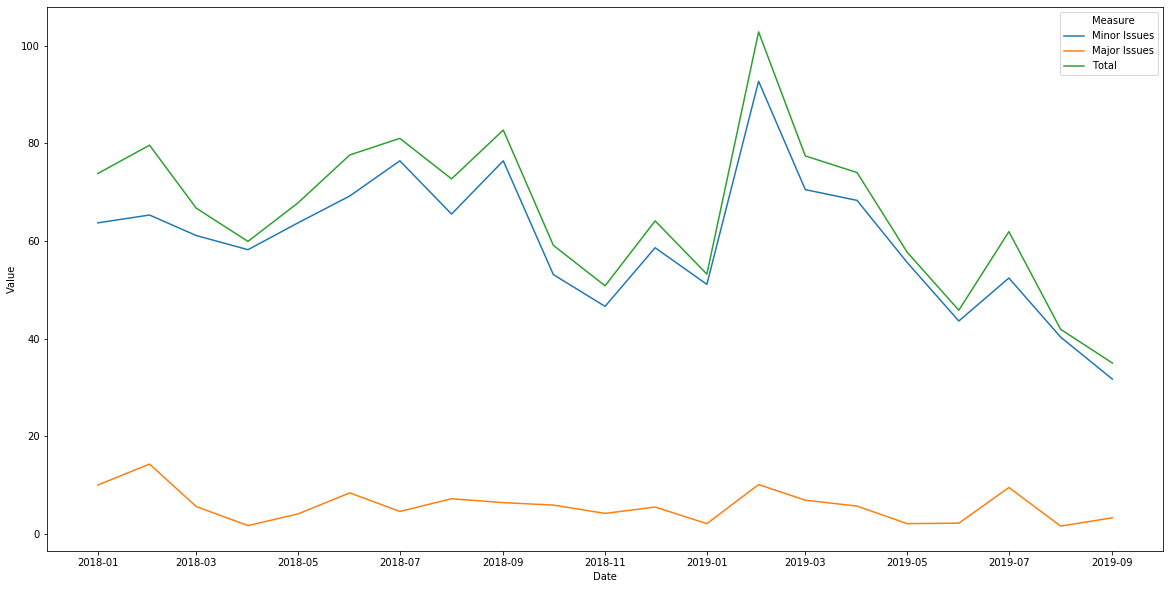

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.set_theme(style="darkgrid")
df2 = pd.melt(df, 'Date', var_name='Measure', 
              value_name='Value')

sns.lineplot('Date', 'Value', hue='Measure', 
             data=df2)
#sns.lineplot(data=df, df['Date'], df['Minor Issues'])
plt.show()